<font size="10" color="purple"><left><b><i><u>Exploratory Data Analysis #4</u></i></b></left></font>

<font size="4"><li><left><i>Instanciamos clase EDA con los métodos necesarios</i></left></font>


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
#import pandas_profiling as pdpf
from IPython.display import HTML
#import sweetviz as sv

class EDA:
    def read_csv(self, file_path):
        """
        Lee un archivo CSV y devuelve un dataframe.

        Args:
            file_path (str): Ruta al archivo CSV a leer.

        Returns:
            pd.DataFrame: El dataframe con los datos del archivo CSV.
        """
        dataframe = pd.read_csv(file_path,encoding='UTF-8')
        return dataframe

    def get_columnas(self, dataframe):
        """
        Obtiene una lista de las columnas de un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe del cual se desean obtener las columnas.

        Returns:
            list: Lista de las columnas del dataframe.
        """
        columnas = dataframe.columns.tolist()
        return columnas

    def set_columns_dtype_category(self, dataframe, columnas):
        """
        Asigna el tipo de dato "category" a una lista de columnas en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "category".
        """
        dataframe[columnas] = dataframe[columnas].astype('category')

    def set_columns_dtype_int(self, dataframe, columnas):
        """
        Asigna el tipo de dato "int" a una lista de columnas en un dataframe.
        Los valores nulos en las columnas seleccionadas se reemplazan por 0.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "int".
        """
        dataframe[columnas] = dataframe[columnas].astype(int).fillna(0)

    def set_columns_dtype_float(self, dataframe, columnas):
        """
        Asigna el tipo de dato "float" a una lista de columnas en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "float".
        """
        dataframe[columnas] = dataframe[columnas].astype(float)

    def set_columns_dtype_datetime(self, dataframe, columnas, formato='%Y-%m-%d'):
        """
        Asigna el tipo de dato "datetime" a una lista de columnas en un dataframe, con el formato especificado.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "datetime".
            formato (str): El formato de fecha a utilizar (por defecto: "%Y-%m-%d").
        """
        dataframe[columnas] = pd.to_datetime(dataframe[columnas], format=formato)

    def rename_columns(self, dataframe, column_mapping):
        """
        Modifica los nombres de las columnas de un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se le van a modificar los nombres de las columnas.
            column_mapping (dict): Un diccionario que contiene el mapeo de los nombres actuales de las columnas a los nuevos nombres.

        Returns:
            pd.DataFrame: El dataframe con los nombres de columnas modificados.
        """
        dataframe.rename(columns=column_mapping, inplace=True)
        return dataframe

    def get_duplicate_rows(self, dataframe, column):
        """
        Devuelve las filas del dataframe que tienen valores repetidos en una columna específica,
        junto con la cantidad de repeticiones y el porcentaje respecto al total de líneas.

        Args:
            dataframe (pd.DataFrame): El dataframe a analizar.
            column (str): El nombre de la columna en la cual buscar repeticiones.

        Returns:
            pd.DataFrame: Un dataframe con las filas que se repiten, la cantidad de repeticiones
                        y el porcentaje respecto al total de líneas.
        """
        duplicated_rows = dataframe[dataframe.duplicated(subset=column, keep=False)]
        duplicated_counts = duplicated_rows[column].value_counts().reset_index()
        duplicated_counts.columns = [column, 'Cantidad']
        duplicated_counts['Porcentaje'] = duplicated_counts['Cantidad'] / len(dataframe) * 100
        return duplicated_counts
    
    def get_duplicate_rows_2(self, dataframe, column):
        """
        Devuelve las filas del dataframe que tienen valores repetidos en una columna específica.
        Incluye las otras columnas del dataframe, la cantidad y el porcentaje de filas duplicadas.
        Ordena el resultado por los valores de la columna especificada.

        Args:
            dataframe (pd.DataFrame): El dataframe a analizar.
            column (str): El nombre de la columna en la que se buscarán valores duplicados.

        Returns:
            pd.DataFrame: El dataframe con las filas duplicadas, incluyendo las otras columnas,
                        la cantidad y el porcentaje de filas duplicadas. Ordenado por la columna especificada.
        """
        duplicates = dataframe[dataframe.duplicated(subset=column, keep=False)]
        duplicate_counts = duplicates[column].value_counts()
        duplicate_percentages = duplicate_counts / len(dataframe) * 100

        duplicates['Duplicate Count'] = duplicates[column].map(duplicate_counts)
        duplicates['Duplicate Percentage'] = duplicates[column].map(duplicate_percentages)

        duplicates = duplicates.sort_values(by=column)

        return duplicates

    def strip_column_values(self, dataframe, column_names):
        """
        Elimina los espacios en blanco al inicio y al final de los valores de las filas de las columnas especificadas.

        Args:
            dataframe (pd.DataFrame): El dataframe en el cual se van a limpiar los valores de las columnas.
            column_names (list): Una lista de nombres de columnas a las cuales se les va a aplicar el método .strip().

        Returns:
            pd.DataFrame: El dataframe con los valores de las filas de las columnas especificadas limpios de espacios en blanco.
        """
        for column in column_names:
            dataframe[column] = dataframe[column].str.strip()
        return dataframe

    def sort_dataframe(self, dataframe, column, order='a'):
        """
        Ordena un dataframe por una columna especificada.

        Args:
            dataframe (pd.DataFrame): El dataframe a ordenar.
            column (str): El nombre de la columna por la cual ordenar el dataframe.
            order (str, opcional): El orden de clasificación. 'a' para ascendente (predeterminado),
                'd' para descendente.

        Returns:
            pd.DataFrame: El dataframe ordenado por la columna especificada.
        """
        if order == 'd':
            dataframe = dataframe.sort_values(column, ascending=False)
        else:
            dataframe = dataframe.sort_values(column)

        return dataframe

    def sort_and_replace(self, dataframe, column1, column2):
        """
        Ordena un dataframe de menor a mayor según los valores de una columna y reemplaza los valores de otra columna por enteros.

        Args:
            dataframe (pd.DataFrame): El dataframe a procesar.
            column1 (str): El nombre de la primera columna según la cual se va a ordenar el dataframe.
            column2 (str): El nombre de la segunda columna cuyos valores se reemplazarán por enteros.

        Returns:
            pd.DataFrame: El dataframe ordenado y con los valores de la segunda columna reemplazados por enteros.
        """
        # Ordenar dataframe por la columna 1 de menor a mayor
        dataframe = dataframe.sort_values(by=column1)

        # Reemplazar los valores de la columna 2 por enteros
        dataframe[column2] = range(len(dataframe))

        return dataframe
        
    def convert_date_format(self, dataframe, columns):
        """
        Convierte el formato de fecha de columnas en un dataframe de 'MMM DD, YYYY' a 'YYYY-MM-DD'
        y asigna el dtype datetime a las columnas especificadas.

        Args:
            dataframe (pd.DataFrame): El dataframe a procesar.
            columns (list): Una lista de nombres de columnas a convertir y asignar el dtype datetime.

        Returns:
            pd.DataFrame: El dataframe con los formatos de fecha modificados y dtype datetime asignado.
        """
        for column in columns:
            dataframe[column] = pd.to_datetime(dataframe[column], format='%b %d, %Y').dt.strftime('%Y-%m-%d')
            dataframe[column] = pd.to_datetime(dataframe[column])
            
        return dataframe

    def remove_prefix(self, dataframe, column, prefix):
        """
        Elimina un prefijo de las filas de una columna en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe a procesar.
            column (str): El nombre de la columna en la que se eliminará el prefijo.
            prefix (str): El prefijo a eliminar de las filas de la columna.

        Returns:
            pd.DataFrame: El dataframe con el prefijo eliminado de las filas de la columna especificada.
        """
        dataframe[column] = dataframe[column].str.lstrip(prefix)
        return dataframe
    
    def transform_values(self, dataframe, columns, symbols):
        """
        Transforma los valores de las columnas especificadas en el dataframe, eliminando símbolos, realizando un strip y convirtiendo a minúscula.

        Args:
            dataframe (pd.DataFrame): El dataframe a transformar.
            columns (list): La lista de nombres de columnas a transformar.
            symbols (list): La lista de símbolos a eliminar.

        Returns:
            pd.DataFrame: El dataframe con los valores transformados.
        """
        for column in columns:
            for symbol in symbols:
                dataframe[column] = dataframe[column].str.replace(symbol, '')
            dataframe[column] = dataframe[column].str.strip().str.lower()

        return dataframe

    def replace_na_values_obj(self, dataframe, columns, replacement):
        """
        Reemplaza los valores NaN en las columnas especificadas del dataframe con un valor de reemplazo.

        Args:
            dataframe (pd.DataFrame): El dataframe en el que se reemplazarán los valores NaN.
            columns (list): La lista de nombres de columnas en las que se realizará el reemplazo.
            replacement (str): El valor de reemplazo para los valores NaN.

        Returns:
            pd.DataFrame: El dataframe con los valores NaN reemplazados.
        """
        dataframe[columns] = dataframe[columns].fillna(replacement)
        return dataframe

    def convert_values_to_int(self,dataframe, columns, str_to_remove):
        """
        Convierte los valores de las columnas seleccionadas del dataframe en enteros.

        Los valores de las columnas seleccionadas que contengan el str indicado se eliminan.
        Los valores restantes se convierten a enteros.

        Args:
            dataframe (pd.DataFrame): El dataframe original.
            columns (list): Lista de nombres de columnas a modificar.
            str_to_remove (str): El str a eliminar de los valores de las columnas.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores convertidos a enteros.
        """
        for column in columns:
            dataframe[column] = dataframe[column].str.replace(str_to_remove, '')
            dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce').astype(pd.Int64Dtype())

        return dataframe

    def convert_values_to_float(self,dataframe, columns, str_to_remove):
        """
        Convierte los valores de las columnas seleccionadas del dataframe en flotantes.

        Los valores de las columnas seleccionadas que contengan el str indicado se eliminan.
        Los valores restantes se convierten a flotantes.

        Args:
            dataframe (pd.DataFrame): El dataframe original.
            columns (list): Lista de nombres de columnas a modificar.
            str_to_remove (str): El str a eliminar de los valores de las columnas.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores convertidos a flotantes.
        """
        for column in columns:
            dataframe[column] = dataframe[column].str.replace(str_to_remove, '')
            dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce').astype(float())

        return dataframe

    def plot_histogram(self, dataframe, column):
        """
        Crea un histograma utilizando countplot para una columna dada en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe del que se extraen los datos.
            column (str): El nombre de la columna para el histograma.
        """
        sns.countplot(data=dataframe, x=column)
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        
        # Calcular los porcentajes de cada categoría
        total_count = len(dataframe)
        ax = plt.gca()
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')
        
        # Formatear el eje y para mostrar porcentajes
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/total_count)))
        
        # Mostrar la imagen en el entorno de ejecución de Jupyter Notebook
        plt.show()
    
    def drop_columns(self, dataframe, column):
        """
        Elimina las columnas especificadas del DataFrame.

        Args:
            column_names (list): Lista de nombres de columnas a eliminar.
        """
        for column_name in column:
            if column_name in dataframe.columns:
                dataframe = dataframe.drop(column_name, axis=1)
            else:
                print(f"La columna '{column_name}' no existe en el DataFrame. Se omitirá.")
        return dataframe

    def replace_null_values(self, dataframe):
        """
        Reemplaza los valores nulos en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea reemplazar los valores nulos.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores nulos reemplazados.
        """
        dataframe = dataframe.fillna({
            column: '' if dtype == 'object' else 0
            for column, dtype in dataframe.dtypes.items()
        })
        return dataframe
    
    def transform_columns_to_int(self,dataframe, columns):
        """
        Transforma las columnas indicadas de un dataframe a tipo entero (int) y reemplaza los valores nulos por 0.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea aplicar la transformación.
            columns (list): La lista de nombres de columna a transformar.

        Returns:
            pd.DataFrame: El dataframe modificado con las columnas transformadas a tipo entero y los valores nulos reemplazados por 0.
        """
        for column in columns:
            dataframe[column] = dataframe[column].fillna(0).astype(int)
        return dataframe

    def convert_column_to_int(self, dataframe, column_name):
        """
        Convierte los valores de una columna en un dataframe a enteros, después de eliminar los caracteres no numéricos.

        Args:
            dataframe (pd.DataFrame): El dataframe que contiene la columna.
            column_name (str): El nombre de la columna a convertir.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores convertidos a enteros.
        """
        dataframe[column_name] = dataframe[column_name].str.replace(r'\D+', '', regex=True)
        dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce').astype(pd.Int64Dtype())

        return dataframe

    def replace_values(self, dataframe, column_name, replace_dict):
        """
        Reemplaza los valores de una columna en un dataframe utilizando un diccionario de búsqueda y reemplazo.

        Args:
            dataframe (pd.DataFrame): El dataframe en el que se desea reemplazar los valores.
            column_name (str): El nombre de la columna en la que se desea realizar el reemplazo.
            replace_dict (dict): Un diccionario que contiene los caracteres a buscar como claves y los caracteres
                                de reemplazo como valores.

        Returns:
            pd.DataFrame: El dataframe con los valores de la columna reemplazados.
        """
        dataframe[column_name] = dataframe[column_name].replace(replace_dict, regex=True)
        return dataframe

    def extract_average_value(self, dataframe, column):
        """
        Extrae el valor promedio de un rango numérico en una columna del dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe que contiene la columna.
            column (str): El nombre de la columna a transformar.

        Returns:
            pd.DataFrame: El dataframe con los valores modificados en la columna seleccionada.
        """
        # Expresión regular para buscar el rango numérico
        pattern = r"(\d+)[^\d]+(\d+)"
        
        # Función para calcular el promedio de los valores en el rango
        def calculate_average(match):
            num1 = int(match.group(1))
            num2 = int(match.group(2))
            average = (num1 + num2) / 2
            return str(average)
        
        # Aplicar la transformación a la columna
        dataframe[column] = dataframe[column].apply(lambda x: re.sub(pattern, calculate_average, x) if pd.notnull(x) else x)
        
        return dataframe
    
    def reorder_columns(self,dataframe, column_mapping):
        """
        Reordena las columnas de un dataframe de acuerdo a un diccionario de mapeo.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se le reordenarán las columnas.
            column_mapping (dict): El diccionario de mapeo que especifica el nuevo orden de las columnas.

        Returns:
            pd.DataFrame: El dataframe con las columnas reordenadas.
        """
        return dataframe[column_mapping.keys()].rename(columns=column_mapping)


# Instancia de la clase EDA
eda = EDA()

<font size="4"><li><left><i>Exportamos udemy_courses.csv a dataframe</i></left></font>

In [89]:
# Path de archivos CSV (MacOS)
path = '/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/rawDataSets/udemy_courses.csv'

# Leer y almacenar los archivos CSV en dataframes
udemy_courses = eda.read_csv(path)

In [2]:
# Path de archivos CSV (Windows)
path = "C:\\Users\\Francisco\\OneDrive\\Documentos\\00 Fran\\01 - Personales\\02-Learn\\0. Data Science\\0. Data Science\\2_projects\\e_MOOCs\\2_Repo\\MOOCs_BA\\rawDataSets\\udemy_courses.csv"

# Leer y almacenar los archivos CSV en dataframes
udemy_courses = eda.read_csv(path)

<font size="4"><li><left><i>Obtenemos información del dataframe</i></left></font>

In [3]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [ ]:
# # Generar el perfil del dataframe
# profile = udemy_courses.profile_report(title='Informe de Pandas-Profiling', explorative=True)
# # Guardar el informe en un archivo HTML
# profile.to_file('/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/reports/udemy_courses.html')
# # Cargar y mostrar el informe HTML
# report_html = open('/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/reports/udemy_courses.html', 'r').read()
# display(HTML(report_html))


In [4]:
num_duplicados = len(udemy_courses[udemy_courses.duplicated()])
porcentaje_duplicados = (num_duplicados/len(udemy_courses))*100
print(porcentaje_duplicados,'%')

0.1631321370309951 %


In [5]:
ejemplos_duplicados = udemy_courses[udemy_courses.duplicated()]
ejemplos_duplicados_ordenados = ejemplos_duplicados.sort_values(by='course_id')
ejemplos_duplicados_ordenados.head(20)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance


In [6]:
udemy_courses = udemy_courses.drop_duplicates()
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   url                  3672 non-null   object 
 3   is_paid              3672 non-null   bool   
 4   price                3672 non-null   int64  
 5   num_subscribers      3672 non-null   int64  
 6   num_reviews          3672 non-null   int64  
 7   num_lectures         3672 non-null   int64  
 8   level                3672 non-null   object 
 9   content_duration     3672 non-null   float64
 10  published_timestamp  3672 non-null   object 
 11  subject              3672 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 347.8+ KB


<font size="4"><li><left><i>Clasificamos variables y renombramos algunas para mantener consistencia con el resto de los datasets:</i></left></font>

In [7]:
# Obtener lista de columnas
columnas = eda.get_columnas(udemy_courses)
print(columnas)

['course_id', 'course_title', 'url', 'is_paid', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level', 'content_duration', 'published_timestamp', 'subject']


In [8]:
# Reembramos columna 'course_title' a 'title'
# Definir un diccionario de mapeo de nombres de columnas
column_mapping = {'course_title':'title'}

# Llamar al método rename_columns
udemy_courses = eda.rename_columns(udemy_courses, column_mapping)

<font size="4"><li><left><i>Definimos variables cualitativas:</i></left></font><br>
<br>
<font size="4"><left><i>- Ordinales: `level`</i></left></font><br>
<br>
<font size="4"><left><i>- Nominales: `title`, ``published_timestamp``, ``subject``, ``is_paid``  y `url`</i></left></font><br>
<br>
<font size="4"><li><left><i>Definimos variables cuantitativas:</i></left></font><br>
<br>
<font size="4"><left><i>- Discretas: ``num_subscribers``, ``num_reviews`` y `num_lectures` </i></left></font><br>
<br>
<font size="4"><left><i>- Continuas: `price` y `content_duration` </i></left></font><br>
<br>
<br><font size="4"><li><left><i>PK:</i></left></font><br>
<br>
<font size="4"><left><i>- `course_id`</i></left></font><br>


In [9]:
udemy_courses.head(2)

,course_id,title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


In [10]:
filtered_df = udemy_courses[(udemy_courses['is_paid'] == False) & (udemy_courses['price'] != 0)]
filtered_df.head(10)

,course_id,title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


<font size="4" color="white"><li><left><i>Dado que en todos los casos donde `is_paid` es `False` el atributo `price` es igual a `0`, mientras que donde `is_paid` es `True` el atributo `price` es mayor a `0`, se define eliminar columna `is_paid`: </i></left></font>

In [11]:
# Lista de columnas a eliminar
drop_columns = ['is_paid']
# Guardamos el dataframe sin la columna elegida
udemy_courses = eda.drop_columns(udemy_courses,drop_columns)
udemy_courses.head(2)

,course_id,title,url,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


In [12]:
#Transformar valores de columnapublished_timestamp a formato YYY-MM-DD
udemy_courses['published_timestamp'] = udemy_courses['published_timestamp'].str.split('T').str[0]

<font size="4" color="white"><li><left><i>Eliminamos espacios antes/despues:</i></left></font>

In [13]:
# Eliminar espacios alrededor de str
# Definir una lista de nombres de columnas a limpiar
columnas_a_limpiar = ['title', 'url', 'level','published_timestamp', 'subject']

# Llamar al método strip_column_values
udemy_courses = eda.strip_column_values(udemy_courses, columnas_a_limpiar)

<font size="4"><li><left><i>Realizamos las últimas modificacions para compatibilizar con los otros datasets:</i></left></font>

In [14]:
# Insertamos nuevas columnas y poblamos lineas
columns = ['institution','provider','language','rating']
values = ['udemy','udemy','','']

for i, column in enumerate(columns):
    udemy_courses.insert(9 + i, column, values[i])


In [15]:
# Reordenar las columnas del dataframe
dataframe_reordenado = udemy_courses.reindex(columns=['course_id','provider','institution','title','subject','url','price','level','num_subscribers','num_lectures',
       'num_reviews','rating','content_duration','language','published_timestamp'])
dataframe_reordenado.head()

,course_id,provider,institution,title,subject,url,price,level,num_subscribers,num_lectures,num_reviews,rating,content_duration,language,published_timestamp
0,1070968,udemy,udemy,Ultimate Investment Banking Course,Business Finance,https://www.udemy.com/ultimate-investment-bank...,200,All Levels,2147,51,23,,1.5,,2017-01-18
1,1113822,udemy,udemy,Complete GST Course & Certification - Grow You...,Business Finance,https://www.udemy.com/goods-and-services-tax/,75,All Levels,2792,274,923,,39.0,,2017-03-09
2,1006314,udemy,udemy,Financial Modeling for Business Analysts and C...,Business Finance,https://www.udemy.com/financial-modeling-for-b...,45,Intermediate Level,2174,51,74,,2.5,,2016-12-19
3,1210588,udemy,udemy,Beginner to Pro - Financial Analysis in Excel ...,Business Finance,https://www.udemy.com/complete-excel-finance-c...,95,All Levels,2451,36,11,,3.0,,2017-05-30
4,1011058,udemy,udemy,How To Maximize Your Profits Trading Options,Business Finance,https://www.udemy.com/how-to-maximize-your-pro...,200,Intermediate Level,1276,26,45,,2.0,,2016-12-13


In [16]:
unique_provider = dataframe_reordenado['course_id'].unique()
unique_provider.shape

(3672,)

In [17]:
dataframe_reordenado_2 = dataframe_reordenado
dataframe_reordenado_2['course_id'] = 'u-' + dataframe_reordenado_2['course_id'].astype(str)

In [85]:
# Exportamos dataframe a csv
# Definimos path
path_out_csv = '/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/rawDataSets/udemy_courses_norm.csv'

dataframe_reordenado_2.to_csv(path_out_csv, index=False, encoding='UTF-8', decimal='.')

In [18]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   title                3672 non-null   object 
 2   url                  3672 non-null   object 
 3   price                3672 non-null   int64  
 4   num_subscribers      3672 non-null   int64  
 5   num_reviews          3672 non-null   int64  
 6   num_lectures         3672 non-null   int64  
 7   level                3672 non-null   object 
 8   content_duration     3672 non-null   float64
 9   institution          3672 non-null   object 
 10  provider             3672 non-null   object 
 11  language             3672 non-null   object 
 12  rating               3672 non-null   object 
 13  published_timestamp  3672 non-null   object 
 14  subject              3672 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory u

<font size="4" color="white"><li><left><i>Analizamos atributo `subject` para contrastar con el resto de datasets:</i></left></font>

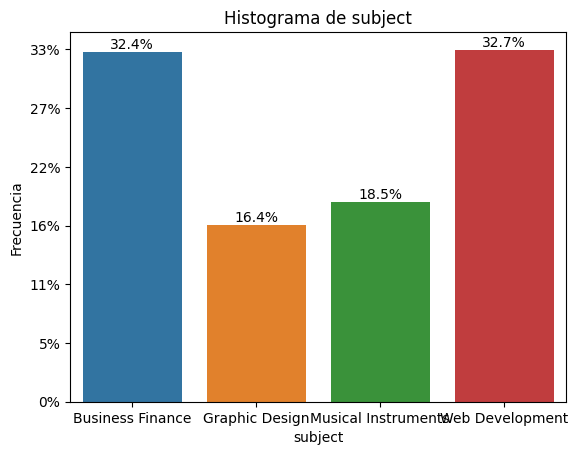

In [19]:
eda.plot_histogram(udemy_courses,'subject')

In [20]:
udemy_subject = udemy_courses['subject'].unique()
udemy_subject

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [21]:
udemy_courses.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


<font size="4" color="white"><li><left><i>Evaluamos la taza de personas que dejan un `num_reviews` respecto al total de `num_subscribers`, con el fin de inferir valores en otros datasets</i></left></font>

<Axes: xlabel='price', ylabel='content_duration'>

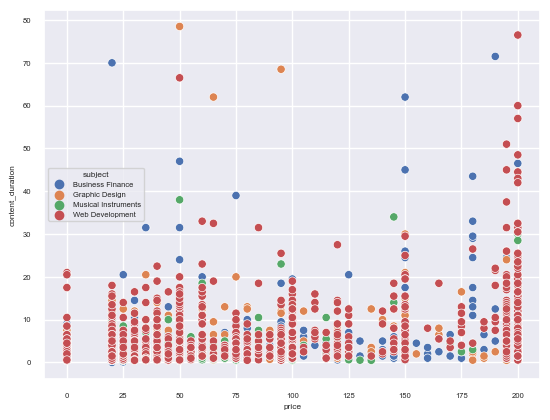

In [26]:
sns.scatterplot(x='price', y='content_duration',hue='subject', data=udemy_courses[udemy_courses['subject'].isin(['Business Finance','Graphic Design','Musical Instruments','Web Development'])])

<Axes: xlabel='price', ylabel='num_subscribers'>

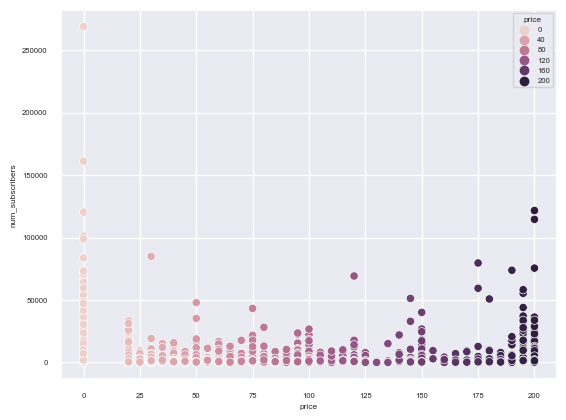

In [27]:
sns.scatterplot(x='price', y='num_subscribers',hue='price', data=udemy_courses[udemy_courses['subject'].isin(['Business Finance','Graphic Design','Musical Instruments','Web Development'])])

In [28]:
# Filtro por 'subject':
filtro_institution = udemy_courses[udemy_courses['subject'].isin(['Business Finance','Graphic Design','Musical Instruments','Web Development'])]

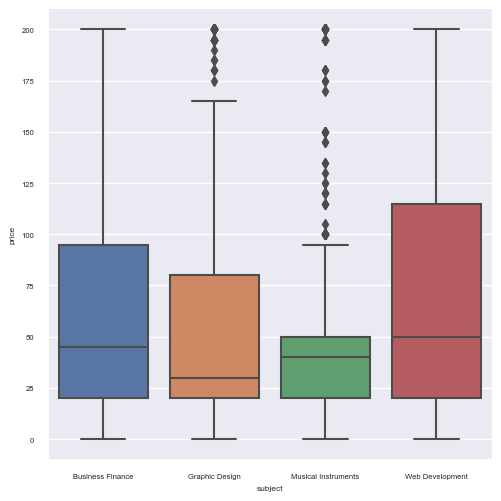

In [29]:
sns.set(font_scale=0.5)
sns.catplot(x='subject', y='price', kind='box', data=filtro_institution)

<font size="4" color="white"><li><left><i>Se nota la variedad y desarrollo de cursos en `Web Development`, siendo el `subject` que tiene mayor precio promedio y maximo.</i></left></font>

<font size="4" color="white"><li><left><i>Creamos `heatmap` para entender correlación entre atributos:</i></left></font>

<Axes: >

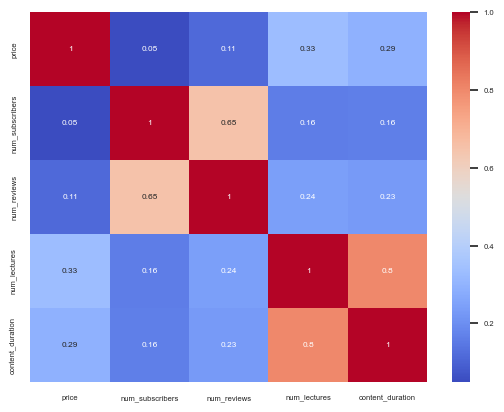

In [ ]:
correlation_matrix = udemy_courses[['price','num_subscribers','num_reviews','num_lectures','content_duration']].corr()

# Crear la tabla de correlación utilizando heatmap de Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')